In [1]:
from IPython.display import HTML

HTML("""
<style>

/* --- Markdown text --- */
div.text_cell_render,
.jp-MarkdownOutput,
.jp-RenderedHTMLCommon {
    font-size: 12px !important;
    line-height: 1.2;
}
/* --- Code input --- */
div.input_area pre {
    font-size: 12px !important;
}

/* --- Syntax-highlighted code --- */
div.highlight pre {
    font-size: 12px !important;
}

/* --- Code outputs --- */
div.output_area pre,
div.output pre,
pre {
    font-size: 10px !important;
    line-height: 1.2 !important;
    white-space: pre-wrap !important;
}

/* --- Pandas DataFrame tables --- */
.dataframe,
.dataframe table,
.dataframe th,
.dataframe td {
    font-size: 12px !important;
}

/* --- DataFrame output container (VS Code specific) --- */
.jp-OutputArea .dataframe {
    font-size: 12px !important;
}

/* --- Markdown tables --- */
.jp-RenderedHTMLCommon table,
.jp-RenderedHTMLCommon th,
.jp-RenderedHTMLCommon td {
    font-size: 10px !important;
}
/* --- Input prompt --- */
.jp-CodeCell .jp-InputPrompt,
div.prompt.input_prompt {
    font-size: 12px !important;
    padding-right: 2px !important;
    color: #888 !important;
}
/* --- Output prompt --- */
.jp-OutputPrompt,
div.prompt.output_prompt {
    font-size: 12px !important;
    padding-right: 2px !important;
    color: #888 !important;
}
</style>
""")


# Modelling Assignment 3

Group member: Liyuan Ding

## Problem Statement ##
Construct a linear regression that predicts a person's sleep duration based on their sleep quality, physical activity levels and stress levels. 

## Variables and Parameters ##
|         Description         |   Symbol   |    Unit         |         Type         |
|:---------------------------:|:----------:|:---------------:|:--------------------:|
|        Sleep Duration       |    $Y$     |        $h$      | Dependent Variable |
|        Sleep Quality        |   $X_1$    |        1        | Independent Variable |
|Duration of Physical Activity|   $X_2$    |  min   | Independent Variable |
|        Stress Level         |   $X_3$    |        1        | Independent Variable |
|Regression coefficient for intercept| $\beta _0$ |        $h$        |   Model Parameter    |
|Regression coefficient for sleep quality| $\beta _1$ |       $h$       |   Model Parameter    |
|Regression coefficient for physical activity duration| $\beta _2$ | $h$/min |   Model Parameter    |
|Regression coefficient for stress level| $\beta _3$ |       $h$       |   Model Parameter    |
|         Error               | $\epsilon$ |      $h$         |   Variable |

## Assumptions & Constraints ##
- The model follows the linear model $\ln (Y) = \beta_0+ \beta_1 \ln (X_1)+\beta_2 X_2+\beta_3X_3+\epsilon$. 
- The average value of the error is 0: $\mathbb{E}(\epsilon_i) = 0$ for all $i$. 
- The variance of the error is constant: $\textrm{Var}(\epsilon_i) = \sigma^2$ for all $i$.
- The error $\vec{\epsilon}$ is a random sample from the normal distribution of zero mean and variance $\sigma^2$.
- The error is independent for each $\epsilon_i$ for all $i$. 
- Participants could accurately gauge their own sleep quality & stress levels. 
- Participants reported their sleep quality, stress levels & physical activity levels accurately. 
- These are the only factors that influence sleep quality. 

## Build the Solution ##

Our model takes the form $\ln (Y) = \beta_0+ \beta_1 \ln (X_1)+\beta_2 X_2+\beta_3X_3+\epsilon$

In [2]:
#import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
%matplotlib inline

In [3]:
## define the inputs and outputs for the regression
sleep_df = pd.read_csv("../data/Sleep.csv")
X = sleep_df[["Quality", "Physical_Activity", "Stress"]]
Y = sleep_df["Duration"]

In [4]:
## make the necessary transformations
Y_log = np.log(Y)
Quality_log = np.zeros(len(sleep_df["Quality"]))
for i in range(len(sleep_df["Quality"])):
    Quality_log[i] = np.log(sleep_df["Quality"][i])
sleep_df["Quality Log"] = Quality_log
X_transformed = sleep_df[["Quality Log", "Physical_Activity", "Stress"]]

In [5]:
# run the regression
X_logged = sm.add_constant(X_transformed)
reg_logged = sm.OLS(Y_log, X_logged).fit()
summary_table_logged = reg_logged.summary()
print(summary_table_logged)

                            OLS Regression Results                            
Dep. Variable:               Duration   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     420.3
Date:                Sat, 29 Nov 2025   Prob (F-statistic):          8.92e-119
Time:                        03:19:56   Log-Likelihood:                 565.18
No. Observations:                 374   AIC:                            -1122.
Df Residuals:                     370   BIC:                            -1107.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.2445      0.08

The model takes the form   
$\ln(\hat{Y}) = 1.2445 + 0.3963\cdot \ln(X_1) + 0.0004\cdot X_2 - 0.0177\cdot X_3$   
(which can also be written as $\hat{Y} = e^{1.2445}\cdot X_1^{0.3963}\cdot e^{0.0004 X_2}\cdot e^{-0.0177X_3}$). 

## Analyze & Assess ##

We selected this combination of transformations because we found it to violate the fewest linear regression assumptions, and because it appeared to better fit the data overall.    

We found that the transformed model in fact has a lower adjusted R-squared value than the non-transformed version - but since the original model strongly violates many of the assumptions on the error, the higher adjusted R-squared means little. 

In [6]:
X = sm.add_constant(X)
reg_original = sm.OLS(Y,X).fit()
summary_table = reg_original.summary()

The Adjusted R-squared value for the transformed model is around 0.771, which is a decent score for predicting human activities.

|         Model         |   R-squared   |    Adjusted R-squared    |
|:---------------------:|:-------------:|:------------------------:|
|    Non-transformed    |     0.785     |           0.783          |
|      Transformed      |     0.773     |           0.771          |

The transformed model also has a smaller bias term and a smaller standard error associated with each term.

|         Model         |   Bias        |    Quality   |   Physical_Activity   | Stress|
|:---------------------:|:-------------:|:------------------------:|:-------------:|:---:|
|    Non-transformed    |    3.6737     |          0.4981         |0.0024|-0.0607|
|      Transformed      |    1.2445    |          0.3963         |0.0004|-0.0177|

#### Assumption: Average Value of the Error is Zero ####

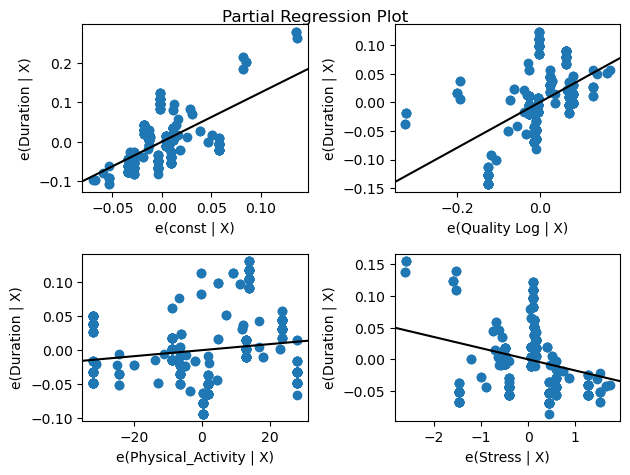

In [7]:
sm.graphics.plot_partregress_grid(reg_logged)
plt.show()

- The residual-covariate plots for our model were good, showing a random scatter around the line y=0. The residual-covariate plots for the non-transformed model also appeared random. 
- The partial regression plots, however, are scattered and the points lie only very approximately along the line - this means that the average value of the error is likely not zero, either in the transformed model (plots above) or the original model (plots not shown)

#### Assumption: Variance of the Error is Constant ####

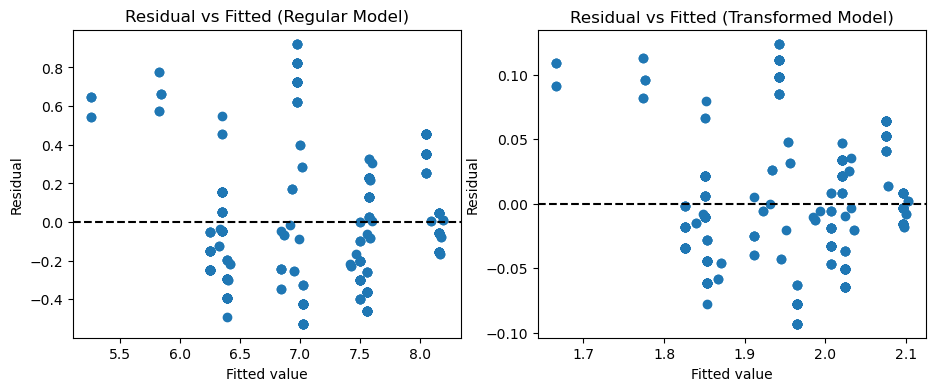

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(11, 4))
fitted_y = reg_original.fittedvalues
residuals = reg_original.resid
fitted_y_log = reg_logged.fittedvalues
residuals_log = reg_logged.resid
axes[0].scatter(fitted_y, residuals)
axes[0].axhline(y=0, color='k', linestyle='--')
axes[0].set_xlabel('Fitted value')
axes[0].set_ylabel('Residual')
axes[0].set_title('Residual vs Fitted (Regular Model)')

axes[1].scatter(fitted_y_log,residuals_log)
axes[1].axhline(y=0, color='k', linestyle='--')
axes[1].set_xlabel('Fitted value')
axes[1].set_ylabel('Residual')
axes[1].set_title('Residual vs Fitted (Transformed Model)')
plt.show()

- The number of negative residuals increases from the left to the right in the non-transformed model, whereas the residuals in the transformed model are randomly scattered. The residuals are more evenly spread above and below the horizontal axis.
- The lack of a perfect random scatter here can also partially be attributed to the integer values taken by the 'sleep quality' and 'stress level' variables. 

#### Assumption: Error is a random sample from a normal distribution ####

- The QQ-plot of  transformed model follows the line $y=x$ closely in the range of $x\in [-1,1]$. It is quite good, though it deviates more significantly outside this range, suggesting violation of the assumption (the slight S-shape suggests a distribution that is more light-tailed than normal). 

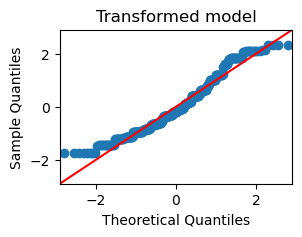

In [9]:
fig, ax = plt.subplots(figsize=(3, 2))
sm.qqplot(residuals_log, fit=True, line="45", ax = ax)
plt.title("Transformed model")
plt.show()

#### Assumption: Errors are independent

Our data is not time series data, so we are not able to run the residual vs index plot.

### Interpretation of the result
Because of the reason we argued earlier, we will stick with the transformed model for the rest of the report:

$\ln(\hat{Y}) = 1.2445 + 0.3963\cdot \ln(X_1) + 0.0004\cdot X_2 - 0.0177\cdot X_3$  

- The model suggests that as the `Quality Log`($X_1$) increases by 1%, the `Duration` ($Y$) increases by approximately 0.4%.
- We also see that as the `Physical Activity` ($X_2$) increases by 1 minute, the `Duration` ($Y$) increases by a factor of $e^{0.0004}$($\approx 1.0004$), or $0.04\%$. If the `Physical Activity` increases by an hour, the `Duration` increases by $2.4\%$, which is around 1 minute and 26 seconds.
- As `Stress Level` increases by 1, we see `Duration` decrease by $1.78\%$.

The interpretations sounds reasonable except for the effect of `Physical Activity` - it seems to be unexpectedly weak.\
We investigate this by peeking into Alnawwar et al.'s paper. The paper highlights that physical activities play an important role in improving sleep quality, insomnia, and other symptoms of sleep disorders (Alnawwar, M., et al., 2023). \
In this context, our model's prediction makes better sense, because physical activity is helpful for poeple who are not able to fall asleep, but may have limited effect on the sleep duration.

### Limitations of our Model 
#### Multicollinearity


Our summary table gives us warning that the condition number is large, suggesting strong multicollinearity between the covariates. We investigate this by running a correlation matrix.

In [10]:
X_transformed.corr()

,Quality Log,Physical_Activity,Stress
Quality Log,1.000000,0.215380,-0.882162
Physical_Activity,0.215380,1.000000,-0.034134
Stress,-0.882162,-0.034134,1.000000


From the correlation matrix, we observe that `Stress` has a strong negative correlation with `Quality Log`. The paper by David A Kalmbach, Jason R Anderson, and Christopher L Drake titled "The impact of stress on sleep: Pathogenic sleep reactivity as a vulnerability to insomnia and circadian disorders" examines this correlation and states that "exposure to stressful events impairs normal sleep function" (Kalmbach, D., et al., 2018). \
As our model includes covariates with this strong multicollinearity, it brings up problems when we want to interpret the coefficients because if we increase `Stress`($X_3$) not only `Duration`($Y$) but also `Quality Log`($X_1$) will decrease.

#### Use of Non-Standardized Covariates

In [11]:
X_transformed.describe().loc[['min', '25%', '50%', '75%', 'max']]

,Quality Log,Physical_Activity,Stress
min,1.386294,30.0,3.0
25%,1.791759,45.0,4.0
50%,1.945910,60.0,5.0
75%,2.079442,75.0,7.0
max,2.197225,90.0,8.0


From the above dataframe, we see that the ranges of the covariates differ significantly. `Quality Log` has range $[1.38,2.19]$, but `Physical_Acvitity` has range $[30,90]$. With this difference in range, the effect of `Quality Log` may be washed out. However, if we scale them, we are not able to interpret the result as above.

#### Possible Improvements
1. The paper also emphasizes that sleep reactivity varies substantially across individuals, meaning we should not expect a uniform dose–response relationship based on only a few covariates. To better capture these differences, additional features like gender, occupation, etc. may be necessary to predict the target.
2. We can use `StandardScaler` to scale the covariates and use tools like SHAP plots to assess the result.

### Bibliography
[1] Kalmbach, D. A., Anderson, J. R., & Drake, C. L., *The impact of stress on sleep: Pathogenic sleep reactivity as a vulnerability to insomnia and circadian disorders.* J. Sleep Res.,27(6), (2018). \
[2] Alnawwar, M. A., Alraddadi, M. I., Algethmi, R. A., Salem, G. A., Salem, M. A., & Alharbi, A. A., *The Effect of Physical Activity on Sleep Quality and Sleep Disorder: A Systematic Review.* Cureus, 15(8), (2023).